# 逻辑斯谛回归

逻辑斯谛回归(Logistic Regression, LR)是统计学习中的经典分类方法。常见的逻辑斯谛回归模型包括二项逻辑斯谛回归、多项逻辑斯谛回归(多项逻辑斯谛回归可以看做是二项LR的扩展).

## 定义 逻辑斯谛回归模型


### 二项逻辑斯谛回归
二项逻辑斯谛回归模型是如下条件概率分布：
$${P(Y=1|x)=\frac{\exp(w \cdot x+b)}{1+\exp(w \cdot x+b)} \tag{1}}$$

$${P(Y=0|x)=\frac{1}{1+\exp(w \cdot x+b)}\tag{2}}$$
其中$x\in \mathcal{R}^{n}$是输入，$Y\in \{0,1\}$是输出，$w \in \mathcal{R}^{n}$是权值向量参数，$b\in \mathcal{R}$称为偏置，$w\cdot x$为$w$和$x$的内积。

将权值向量和输入向量加以扩充，仍记作$w$,$x$，即$w=\left(w^{(1)},w^{(2)},...,w^{(n)},b \right)^{T}$,$x=\left(x^{(1)},x^{(2)},...,x^{(n)}\right)$,则二项逻辑斯谛回归模型如下：

$${P(Y=1|x)=\frac{\exp(w\cdot x)}{1+\exp(w\cdot x)} \tag{3}}$$

$${P(Y=0|x)=\frac{1}{1+\exp(w\cdot x)}\tag{4}}$$

### 多项逻辑斯谛回归
二项逻辑斯谛回归常用于二分类，可以将二项逻辑斯谛回归扩展为多项逻辑斯谛回归模型，用于多分类任务。

设离散型随机变量$Y$的取值集合为$\{1,2,...,K\}$,则多项逻辑斯谛回归模型为：
$${P(Y=k|x)=\frac{\exp(w_k \cdot x)}{1+\sum_{k=1}^{K-1} \exp(w_k \cdot x)}\tag{5}}$$
其中，$x \in \mathcal{R}^{n+1},w_k \in \mathcal{R}^{n+1}$


### LogisticRegression算法案例 python实现(iris数据)

In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#### 定义LR回归模型分类器

In [2]:
class LogisticReression:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat
    #训练
    def train(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]])
        print('LR模型学习率={},最大迭代次数={}'.format(
            self.learning_rate, self.max_iter))

    # 准确率
    def accuracy(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

#### 构建数据

In [3]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    return data[:,:2], data[:,-1]

In [4]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 训练

In [5]:
LR = LogisticReression()
LR.train(X_train, y_train)

LR模型学习率=0.01,最大迭代次数=200


### 计算测试精度

In [6]:
LR.accuracy(X_test, y_test)

1.0

#### 效果展示

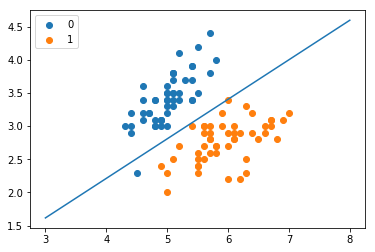

In [7]:
x_ponits = np.arange(3, 9)
y_ = -(LR.weights[1]*x_ponits + LR.weights[0])/LR.weights[2]
plt.plot(x_ponits, y_)

#绘制图
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

### sklearn中的LogisticRegression案例代码

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

#### 第一步：构建数据集

In [9]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])

In [10]:
df[:10]

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


精度:  0.8


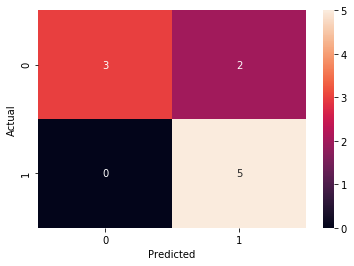

In [11]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']
#  75%的数据用来做训练集，25%的数据用作测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
#训练
logistic_regression.fit(X_train,y_train)
#预测
y_pred=logistic_regression.predict(X_test)

#绘制热力图
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('精度: ',metrics.accuracy_score(y_test, y_pred))

**上述案例均已通过**

----
参考资料：  
《统计学习方法》 

整理制作：深度学习学研社

<div>
<table align="left" border="1" bordercolor="#000000">
    <div>
    <tr>
        <td>
            微信公众号：ID: AI_class_vip<br>
            <img src="../image/gongzhonghao.jpg" width="150" height="150" align="left"/>    
        </td>
    </tr>
    </div>
    <div>
    <tr>
        <td>
        知识星球：机器学习交流学习圈：<br>
    <img src="../image/dlzhishixingqiu.jpg" width="150" height="150" align="left"/>  
        </td>
    </tr>
        </div>
    <div>
     <tr>
        <td>
        配置环境：python 3.4+  
        </td>
    </tr>
        </div>
</table>
</div>
